In [1]:
%matplotlib inline
import numpy as np
import netCDF4 as nc
import sys
import os.path
import pylab as py
import matplotlib.cm as cm
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    reverse = []
    k = []

    for key in cmap._segmentdata:
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:
            data.append((1-t[0],t[2],t[1]))
        reverse.append(sorted(data))

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL)
    return my_cmap_r

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

#filename="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/aqua/aqua_2m.nc"
#filename="/project2/tas1/pragallva/Fall_quarter_2017/land_files/land_test.nc"
#filename="/project2/tas1/pragallva/Fall_quarter_2017/land_files/Ruth_full.nc"
# filename="/project/tas1/pragallva/Fall_quarter_2017/Isca/ocean_qflux.nc"


# Checking the annual mean and zonal mean ocean heat flux as used by Ruth

In [2]:
filename="/project/tas1/pragallva/Fall_quarter_2017/Isca/ocean_qflux.nc"
print filename
data=nc.Dataset(filename,'r')
# print data.variables[dirc[1]]
print data.variables.keys()

qflux=data.variables['ocean_qflux'][:]
time=data.variables['time'][:]
lat=data.variables['lat'][:]
lon=data.variables['lon'][:]

/project/tas1/pragallva/Fall_quarter_2017/Isca/ocean_qflux.nc
[u'lat', u'lon', u'latb', u'lonb', u'time', u'ocean_qflux']


In [12]:
ocean_flux=qflux.mean(axis=0).mean(axis=-1)

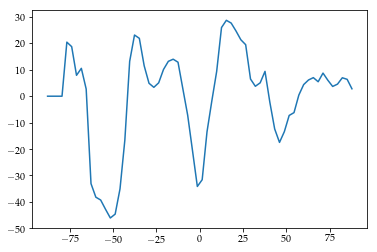

In [13]:
py.plot(lat,ocean_flux)

# Checking the annual mean and zonal mean ocean heat flux of CMIP3

In [11]:
#filename="/project2/tas1/pragallva/Winter_quarter_2018/cmip3_data/qflux_O1.nc"
## project=CMIP3, model=CCSR/NIES/FRCGC, MIROC Model V3.2, high resolution, experiment=slab ocean control, ensemble=run1, time_frequency=mon, version=1 


#filename="/project2/tas1/pragallva/Winter_quarter_2018/cmip3_data/qflux_o1_slabcntl_1_cgcm3.1_t47.nc"
1. ## project=CMIP3, model=Canadian Centre for Climate Modelling and Analysis, CGCM3.1 Model, T63, experiment=slab ocean control, ensemble=run1, time_frequency=mon, version=1 

filename="/project2/tas1/pragallva/Winter_quarter_2018/cmip3_data/qflux_O1.GISS1.Slabcntl.amended.nc"
2. ## project=CMIP3, model=NASA Goddard Institute for Space Studies, ModelE20/Russell, experiment=slab ocean control, ensemble=run1, time_frequency=mon, version=1 

filename="/project2/tas1/pragallva/Winter_quarter_2018/cmip3_data/qflux_O1d_Slabcntl_run1.nc"
2. ## project=CMIP3, model=NASA Goddard Institute for Space Studies, ModelE20/Russell, experiment=slab ocean control, ensemble=run1, time_frequency=mon, version=1 



/project2/tas1/pragallva/Winter_quarter_2018/cmip3_data/qflux_O1.GISS1.Slabcntl.amended.nc
[u'lon', u'lon_bnds', u'lat', u'lat_bnds', u'time', u'time_bnds', u'qflux']


# 1. and 2. are old SOM

In [ ]:

print filename
data=nc.Dataset(filename,'r')
# print data.variables[dirc[1]]
print data.variables.keys()

qflux=data.variables['qflux'][:]
ocean_flux=qflux.mean(axis=-1).mean(axis=0)
# time=data.variables['time'][:]
lat=data.variables['lat'][:]
lon=data.variables['lon'][:]

In [12]:
ocean_flux.shape

(46,)

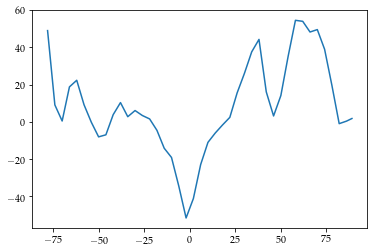

In [13]:
py.plot(lat,ocean_flux)

In [5]:
a=6371e3
import scipy.integrate as integrate
def integrated(x):
    l=np.deg2rad(lat)
    x=x*np.cos(l)
    int_x  =integrate.cumtrapz(x[::-1],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x      ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x[::-1][1:]+int_x_r[:-1])/2.0
    return avg_int_r/10**15

def zon_int(x):
    y=x*2*np.pi*np.cos(np.deg2rad(lat[1:-1]))*a
    return y/10**15

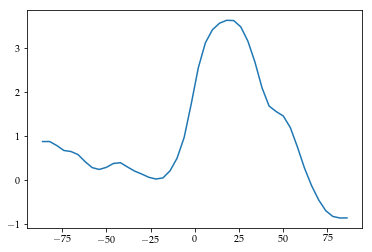

In [14]:
ocean_tranport=(-integrated(ocean_flux))
py.plot(lat[1:-1],ocean_tranport)

# Checking the default ocean qflux when using no seasonal qflux

In [33]:
filename="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_realnoqflux.nc"
print filename, 'ok'
data=nc.Dataset(filename,'r')
print data.variables.keys()

/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_realnoqflux.nc ok
[u'lon', u'lonb', u'lat', u'latb', u'time', u'nv', u'pfull', u'phalf', u'scalar_axis', u'ps', u'pres_full', u'pres_half', u'bk', u'pk', u'ucomp', u'vcomp', u'temp', u'sphum', u'omega', u'zsurf', u'height', u'height_half', u'EKE', u'vor', u'div', u'flux_sw', u'flux_lw', u'rrtm_albedo', u'olr', u'coszen', u'toa_sw', u'flux_oceanq', u't_surf', u'flux_lhe', u'flux_t', u'average_T1', u'average_T2', u'average_DT', u'time_bounds']


In [34]:
no_season_q=data.variables['flux_oceanq'][:]

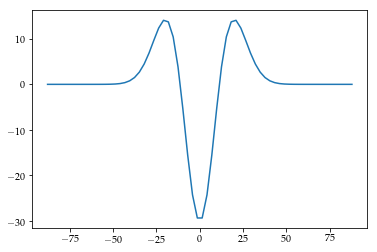

In [52]:
mean_ocean_q = no_season_q.mean(axis=0).mean(axis=-1)
py.plot(lat,mean_ocean_q)

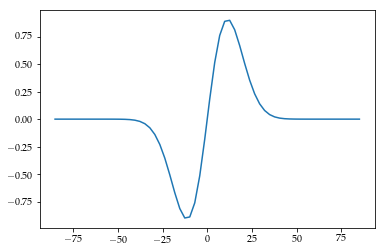

In [57]:
ocean_tranport=(-integrated(mean_ocean_q))
py.plot(lat[1:-1],ocean_tranport)

In [12]:
qflux.shape
import reverse_cmap as rc
my_cmap_r  = rc.rcmap(cm.RdBu)


2


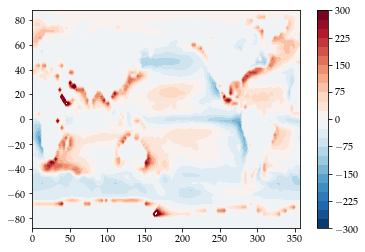

In [15]:
m=m+1;
vv=np.linspace(-300,300,25)
py.contourf(lon, lat, qflux[:,:,:].mean(axis=0),vv, cmap=my_cmap_r)
py.colorbar()
# py.ylim(-150,150)
print m

In [65]:
vv=np.linspace(-150,150,50)
print vv

[-150.         -143.87755102 -137.75510204 -131.63265306 -125.51020408
 -119.3877551  -113.26530612 -107.14285714 -101.02040816  -94.89795918
  -88.7755102   -82.65306122  -76.53061224  -70.40816327  -64.28571429
  -58.16326531  -52.04081633  -45.91836735  -39.79591837  -33.67346939
  -27.55102041  -21.42857143  -15.30612245   -9.18367347   -3.06122449
    3.06122449    9.18367347   15.30612245   21.42857143   27.55102041
   33.67346939   39.79591837   45.91836735   52.04081633   58.16326531
   64.28571429   70.40816327   76.53061224   82.65306122   88.7755102
   94.89795918  101.02040816  107.14285714  113.26530612  119.3877551
  125.51020408  131.63265306  137.75510204  143.87755102  150.        ]


In [8]:
ls /project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/

land_0080.nc     land_3080_0030.nc  land_real3.nc  land_real.nc
land_20_2080.nc  land_3560_op.nc    land_real4.nc  land_rec20m.nc
land_20m.nc      land_real2.nc      land_real5.nc


In [2]:
#flux_oceanq=data.variables['flux_oceanq'][:]
lat=data.variables['lat'][:]

In [3]:
land_mask=data.variables['land_mask'][:]
zsurf=data.variables['zsurf'][:]
lat=data.variables['lat'][:]
lon=data.variables['lon'][:]

In [26]:
land_mask.shape

(64, 128)

In [31]:
land_mask.fill(-1)

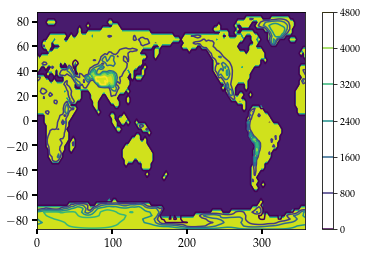

In [3]:
py.contourf(lon,lat,land_mask)
py.contour(lon,lat,zsurf)
py.tick_params(labelsize=12,size=5,width=2)
py.colorbar()

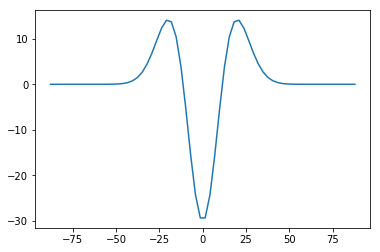

In [10]:
import pylab as py
%matplotlib inline
py.plot(lat,flux_oceanq.mean(axis=-1).mean(axis=0))
np.save('/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/aqua_2m/flux_oceanq.npy',flux_oceanq)

In [4]:
%matplotlib inline
import numpy as np
import netCDF4 as nc
import sys
import os.path
import pylab as py
import reverse_cmap as rc
import matplotlib.cm as cm

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

#filename="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/aqua/aqua_2m.nc"
#filename="/project2/tas1/pragallva/Fall_quarter_2017/land_files/land_test.nc"
#filename="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/aqua/aqua_20m.nc"
filename="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_real.nc"
filename1="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_real2.nc"
filename3="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_real3.nc"
filename4="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_real4.nc"
filename5="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_real5.nc"

land_file="/project2/tas1/pragallva/Fall_quarter_2017/land_files/Ruth_full.nc"
data=nc.Dataset(filename,'r')
data2=nc.Dataset(filename1,'r')
data3=nc.Dataset(filename3,'r')
data4=nc.Dataset(filename4,'r')
data5=nc.Dataset(filename5,'r')
#data_l=nc.Dataset(filename_l,'r')
land_data=nc.Dataset(land_file,'r')
# print data.variables[dirc[1]]
print data.variables.keys()

[u'lon', u'lonb', u'lat', u'latb', u'time', u'nv', u'pfull', u'phalf', u'scalar_axis', u'ps', u'pres_full', u'pres_half', u'bk', u'pk', u'ucomp', u'vcomp', u'temp', u'sphum', u'omega', u'zsurf', u'height', u'height_half', u'EKE', u'vor', u'div', u'flux_oceanq', u't_surf', u'flux_lhe', u'flux_t', u'average_T1', u'average_T2', u'average_DT', u'time_bounds']


In [19]:
ls /project2/tas1/pragallva/Fall_quarter_2017/land_files

ERA_realistic/    land_2080_op.nc        land_3560_op.nc  Ruth_full.nc
land_0080_d20.nc  land_3080_0030_d20.nc  land_test.nc


In [5]:
data['time'][:]

array([ 336963.,  336969.,  336975., ...,  345585.,  345591.,  345597.])

In [5]:
u=data.variables['ucomp'][:]

In [6]:
v=data.variables['vcomp'][:]

In [4]:
u2=data2.variables['ucomp'][:]
v2=data2.variables['vcomp'][:]

In [5]:
u3=data3.variables['ucomp'][:]
v3=data3.variables['vcomp'][:]

In [6]:
u4=data4.variables['ucomp'][:]
v4=data4.variables['vcomp'][:]

In [7]:
u5=data5.variables['ucomp'][:]
v5=data5.variables['vcomp'][:]

In [4]:
v_l.shape

(1440, 40, 64, 128)

In [3]:
#u_l=data_l.variables['ucomp'][:]

In [16]:
#u_l.shape

(1440, 40, 64, 128)

In [24]:
land_mask=land_data.variables['land_mask'][:]

In [25]:
land_mask.shape

(64, 128)

In [7]:
lat   = data.variables['lat'][:]
lon   = data.variables['lon'][:]
plev  = data.variables['pfull'][:]
height= data.variables['height'][:]
# exp_u =u.reshape((12,30,4,40,64,128))
# exp_v =v.reshape((12,30,4,40,64,128))
# exp_v_l =v_l.reshape((12,30,4,40,64,128))
# exp_ht=height.reshape((12,30,4,40,64,128))

In [8]:
pressure  = data.variables['pres_full'][:]

In [31]:
plev

array([  2.71046293e-02,   1.59645674e-01,   5.07758303e-01,
         1.37660832e+00,   3.24380625e+00,   6.76104664e+00,
         1.26635594e+01,   2.16195979e+01,   3.40726255e+01,
         5.01352214e+01,   6.95690194e+01,   9.18477094e+01,
         1.16271923e+02,   1.42096097e+02,   1.68635399e+02,
         1.95336255e+02,   2.21808528e+02,   2.47826628e+02,
         2.73310336e+02,   2.98295634e+02,   3.22903309e+02,
         3.47310180e+02,   3.71725336e+02,   3.96372034e+02,
         4.21474891e+02,   4.47251538e+02,   4.73907768e+02,
         5.01635296e+02,   5.30611356e+02,   5.60999576e+02,
         5.92951685e+02,   6.26609729e+02,   6.62108567e+02,
         6.99578480e+02,   7.39147750e+02,   7.80945091e+02,
         8.25101870e+02,   8.71754013e+02,   9.21043573e+02,
         9.73119947e+02])

In [9]:
import metpy.calc as mcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo
from metpy.units import units

In [10]:
up = data.variables['ucomp'][:] * units(data.variables['ucomp'].units)

In [11]:
pp = pressure * units(data.variables['pres_full'].units)

In [12]:
hp= height* units(data.variables['height'].units)

In [17]:
plevs = [850.] * units.hPa

In [22]:
isobaric_levels = mcalc.log_interp(plevs, pp, hp, up, axis=1)

/home/pragallva/Project1/lib/python2.7/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


In [28]:
upres= isobaric_levels[1]

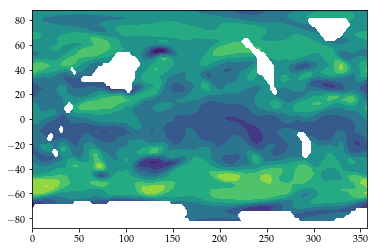

In [30]:
py.contourf(lon, lat, upres[0,0,:,:])

In [42]:
import astropy.units as u
upres[0,0,:,0].magnitude

array([         nan,          nan,          nan,          nan,
                nan,          nan, -16.75678051, -20.46547073,
        -9.21357457,  12.73808057,  25.78963429,  25.40779572,
        26.50133518,  30.45799199,  24.53905402,  10.35087987,
         0.92843559,  -0.04135544,   1.36698693,   0.87916556,
        -1.93723917,  -6.38840325,  -9.81909396, -10.59223205,
        -9.66570828,  -7.12137763,  -4.25345854,  -4.74994458,
        -8.0065821 ,  -7.48991309,  -2.27209714,   1.48193669,
         1.79243046,   3.77420451,   8.0934432 ,   8.77716608,
         3.11404576,  -3.98281817,  -8.38756165, -10.46339904,
       -11.21353389, -10.9972159 ,  -9.21601532,  -2.93763186,
         7.75210577,  16.67710937,  19.36538592,  17.63427714,
        12.63209126,   4.02687627,  -2.62353606,  -2.05369244,
         1.73183256,   3.26698004,   5.15667756,   9.21631969,
        10.52638683,   7.14079634,   3.44616007,   1.95268576,
         1.69809611,   2.52375421,   4.4657546 ,   5.87

In [47]:
units.K

<Unit('kelvin')>

In [17]:
pindex= pressure[np.where( (pressure>80000) & (pressure<90000))]

In [27]:
isobaric_levels

[<Quantity([[[[           nan            nan            nan ...,            nan
                nan            nan]
    [           nan            nan            nan ...,            nan
                nan            nan]
    [           nan            nan            nan ...,            nan
                nan            nan]
    ..., 
    [ 1080.39476583  1076.38050524  1072.50702058 ...,  1092.49186385
      1088.53894283  1084.47491611]
    [ 1063.14368173  1062.15494824  1061.15769305 ...,  1065.79298266
      1064.99072468  1064.09937655]
    [ 1036.20051501  1036.60203546  1036.96249098 ...,  1034.71912097
      1035.26288246  1035.75523985]]]
 
 
  [[[           nan            nan            nan ...,            nan
                nan            nan]
    [           nan            nan            nan ...,            nan
                nan            nan]
    [           nan            nan            nan ...,            nan
                nan            nan]
    ..., 
    [ 1088

In [192]:
lev1=82000
lev2=87000
import numpy.ma as ma
pindex=np.zeros((200,1,64,128))
for t in range(200):
    for la in range(len(lat)):
        for lo in range(len(lon)):
                val = pressure[t,:,la,lo] 
                condition=np.squeeze( np.where( (val>lev1) & (val<lev2) ))
                if condition.size > 1 :
                   index=condition[condition.size/2]
                   pindex[t,:,la,lo]=index
                   req_level[t,:,la,lo]=pressure[t, index, la,lo]

                if condition.size==1  :
                   index=condition
                   pindex[t,:,la,lo]=index
                   req_level[t,:,la,lo]=pressure[t, index, la,lo]

                if condition.size==0  :
                   index=np.nan
                   pindex[t,:,la,lo]=index
                   req_level[t,:,la,lo]=np.nan
                
#     print t          


mpindex = ma.masked_invalid(pindex)
mreq_level = ma.masked_invalid(req_level)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


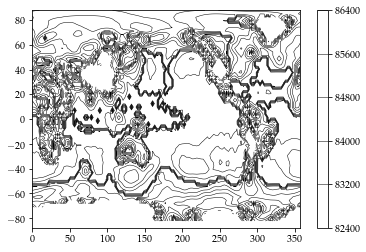

In [255]:
t=0
z=np.squeeze(mreq_level[t,...]) ;
py.contour(lon,lat,z, colors='k',linewidths=0.5) ;py.clabel(c, fmt = '%1.1f', fontsize=30, inline=1)

#np.squeeze(mpindex[t,...]).shape
py.colorbar()

In [185]:
ht850= height[t,mpindex,]


In [257]:
mpindex.shape

(200, 1, 64, 128)

In [87]:
a=np.arange(1,10)
b=np.squeeze(np.where(a>12))
if b.size==0 : b=[np.nan]
print b
print b[0]
print a
# a.fill(False)
# # print a[np.squeeze(b)]
# print a[]
# a.fill(0)


[None]
None
[1 2 3 4 5 6 7 8 9]


In [93]:
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
exp_u =u.reshape((12,30,4,40,64,128))
exp_u2 =u2.reshape((12,30,4,40,64,128))
exp_u3 =u3.reshape((12,30,4,40,64,128))
exp_u4 =u4.reshape((12,30,4,40,64,128))
exp_u5 =u5.reshape((12,30,4,40,64,128))

NameError: name 'u' is not defined

In [12]:
exp_v =v.reshape((12,30,4,40,64,128))
exp_v2 =v2.reshape((12,30,4,40,64,128))
exp_v3 =v3.reshape((12,30,4,40,64,128))
exp_v4 =v4.reshape((12,30,4,40,64,128))
exp_v5 =v5.reshape((12,30,4,40,64,128))

TypeError: Length of y must be number of rows in z.

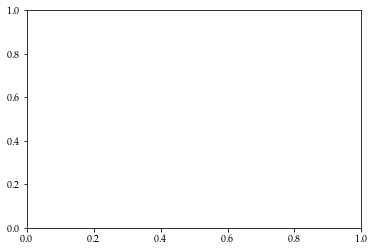

In [125]:
l=-1
lo=lo+1
time=0
# time=time+30*4
py.contourf(lat,lon,pressure[time,:,:,0],50);
py.colorbar()
# py.gca().invert_yaxis()
print plev[l]
print time

In [122]:
pindex = (pressure[t,:,la,lo]>12000) & (pressure[t,:,la,lo]<18000)

In [126]:
pindex = (pressure>12000) & (pressure<18000)

array([[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ..., 
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ..., 
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ..., 
         [False, False, False, ..., False, False, False],
         [False, False,

In [124]:
print pressure[0,pindex,-1,0]

[ 13817.32519531  16397.98828125]


In [33]:
height= data.variables['height'][:]

In [256]:
height.shape

(1440, 40, 64, 128)

In [3]:
#height_l= data_l.variables['height'][:]


In [4]:
exp_ht=height.reshape((12,30,4,40,64,128))
#exp_ht_l=height_l.reshape((12,30,4,40,64,128))

In [27]:
## Calculate stream function ##
lamba0=0.;
phi0  =0.;
a=6371e3 ## Radius of earth in meters

import scipy.integrate as integrate

def integ( x, zonal ) :    
    lo=np.deg2rad(lon) ;  
    la=np.deg2rad(lat) ;
    if zonal ==1 : 
        x=x*np.cos(la)[None,None,None,None,:,None] 
        l=lo
        ax=-1
    elif zonal ==-1 :
        l=la
        ax=-2
    else :
        x=x*np.cos(la)[None,None,None,None,:,None] 
        x=x[:,:,:,::-1,:,:]
        l= plev[::-1]
        ax=3
    int_x = integrate.cumtrapz(x, l ,axis=ax, initial=None) #  (This is basically integration from - 90 deg)
                                                                    
    return int_x

# psi_v = + integ(x = exp_v , zonal=1)
# psi_u = - integ(x = exp_u , zonal=0)

i1=integ(exp_v,0)
i2=integ(exp_v2,0)
i3=integ(exp_v3,0)
i4=integ(exp_v4,0)
i5=integ(exp_v5,0)

mass_stream=-1*(2.0*np.pi*a/10.0)*(i1+i2+i3+i4+i5)/5.0 # for vertical integration
zonal_mass_stream=mass_stream[...,(lon>50) & (lon<150)].mean(axis=-1)

In [47]:
mini=-1*np.max(zonal_mass_stream)
maxi=1*np.max(zonal_mass_stream)

Jan


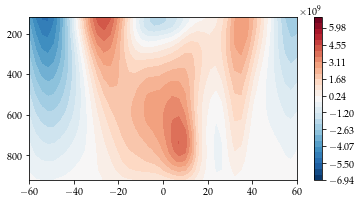

In [63]:
m=0
d=0
my_cmap_r  = rc.rcmap(cm.RdBu)
py.figure(figsize=(6,3))
vv=np.linspace(mini,maxi,30,endpoint=True)
py.contourf(lat, plev[::-1][1:-12], zonal_mass_stream[m,:,:,...].mean(axis=0).mean(axis=0)[:-12,...],vv,cmap=my_cmap_r)
py.gca().invert_yaxis()
# py.yscale('log')
print months[m]
py.xlim(-60,60)
py.colorbar()

May


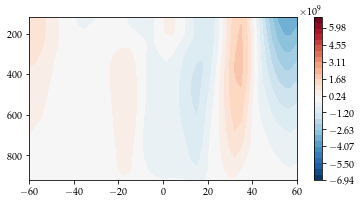

In [54]:
m=m+1
d=0
my_cmap_r  = rc.rcmap(cm.RdBu)
py.figure(figsize=(6,3))
vv=np.linspace(mini,maxi,30,endpoint=True)
py.contourf(lat, plev[::-1][1:-12], zonal_mass_stream[m,:,:,...].mean(axis=0).mean(axis=0)[:-12,...],vv,cmap=my_cmap_r)
py.gca().invert_yaxis()
# py.yscale('log')
print months[m]
py.xlim(-60,60)
py.colorbar()

In [34]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

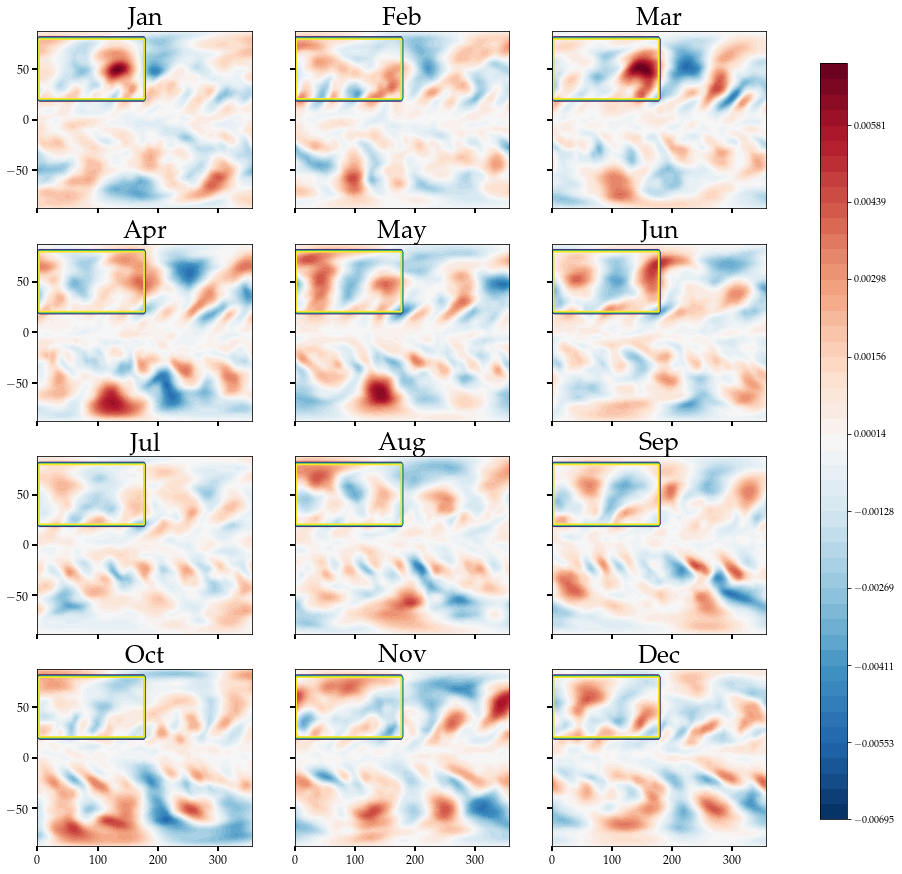

In [34]:
fig, ax = py.subplots(nrows=4, ncols=3, figsize=(15,15), sharex=True, sharey=True)

d=0;h=0
ht=-1;

m=-1

cobar      = (exp_ht[:,:,:,ht,:,:]/10**3).mean(axis=1).mean(axis=1)
diff_bar   =cobar-cobar.mean(axis=-1)[:,:,None]
vv         = np.linspace(-1*np.max(diff_bar),np.max(diff_bar),50,endpoint=True)
my_cmap_r  = rc.rcmap(cm.RdBu)


for row in ax:
    for col in row:
        m=m+1
        plot      = (exp_ht[m,:,:,ht,:,:]/10**3).mean(axis=0).mean(axis=0)
        diff=plot-plot.mean(axis=-1)[:,None]
        im=col.contourf(lon, lat, diff, vv,cmap=my_cmap_r)
        col.contour(lon,lat,land_mask)
        col.tick_params(labelsize=12,size=5,width=2)
        col.set_title(months[m],fontsize=25)
#         print plev[ht]
#         print m
#         print d

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax)

py.show()


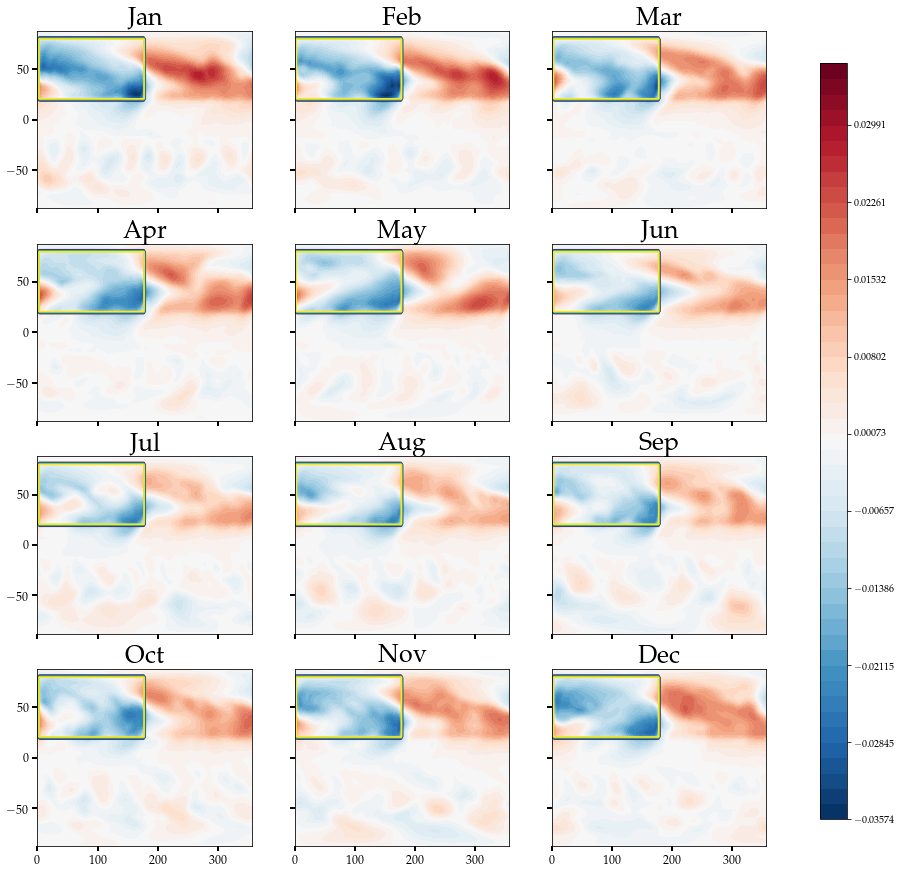

In [35]:
fig, ax = py.subplots(nrows=4, ncols=3, figsize=(15,15), sharex=True, sharey=True)

d=0;h=0
ht=-1;

m=-1

cobar      = (exp_ht_l[:,:,:,ht,:,:]/10**3).mean(axis=1).mean(axis=1)
diff_bar   =cobar-cobar.mean(axis=-1)[:,:,None]
vv         = np.linspace(1*np.min(diff_bar),-1*np.min(diff_bar),50,endpoint=True)
my_cmap_r  = rc.rcmap(cm.RdBu)


for row in ax:
    for col in row:
        m=m+1
        plot      = (exp_ht_l[m,:,:,ht,:,:]/10**3).mean(axis=0).mean(axis=0)
        diff=plot-plot.mean(axis=-1)[:,None]
        im=col.contourf(lon, lat, diff, vv,cmap=my_cmap_r)
        col.contour(lon,lat,land_mask)
        col.tick_params(labelsize=12,size=5,width=2)
        col.set_title(months[m],fontsize=25)
#         print plev[ht]
#         print m
#         print d

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax)

py.show()

In [55]:
## Calculate stream function ##
lamba0=0.;
phi0  =0.;
a=6371e3 ## Radius of earth in meters

import scipy.integrate as integrate

def integ( x, zonal ) :    
    lo=np.deg2rad(lon) ;  
    la=np.deg2rad(lat) ;
    if zonal : 
        x=x*np.cos(la)[None,None,None,None,:,None] 
        l=lo
        ax=-1
    else :
        l=la
        ax=-2
    int_x  =integrate.cumtrapz(x, l ,axis=ax, initial=None) #  (This is basically integration from - 90 deg)
    return a*int_x

psi_v = + integ(x = exp_v , zonal=1)
# psi_u = - integ(x = exp_u , zonal=0)


In [12]:
psi_v.shape

(12, 30, 4, 40, 64, 127)

In [ ]:
psi_v_l = + integ(x = exp_v_l , zonal=1)

In [10]:
psi_l=psi_v_l[...,:-1,:]#+psi_u[...,:-1]
psi  =psi_v[...,:-1,:]#+psi_u[...,:-1]

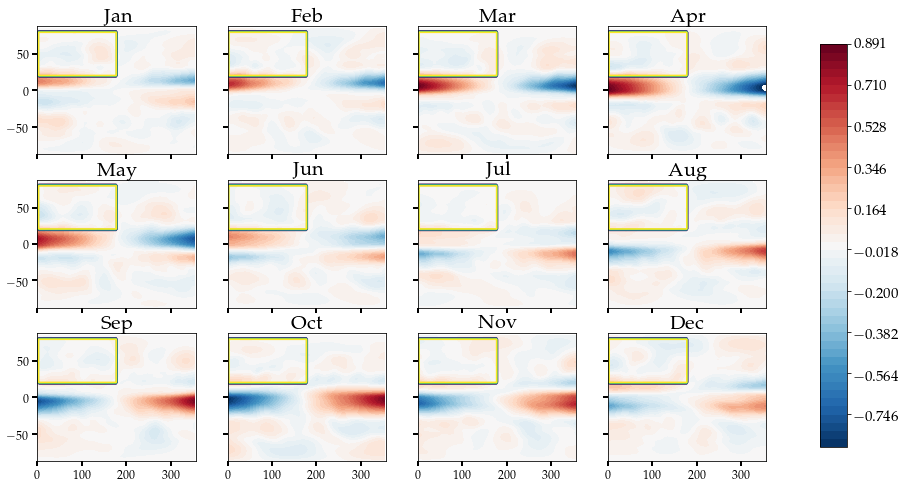

935.031579486


In [14]:
fig, ax = py.subplots(nrows=3, ncols=4, figsize=(15,8), sharex=True, sharey=True)
d=0;h=0
ht=-1;
m=-1
cobar      = (psi[:,:,:,ht,:,:]/10**8).mean(axis=1).mean(axis=1)
diff_bar   =cobar-cobar.mean(axis=-1)[:,:,None]
vv         = np.linspace(-1*np.max(diff_bar),np.max(diff_bar),50,endpoint=True)
my_cmap_r  = rc.rcmap(cm.RdBu)
for row in ax:
    for col in row:
        m=m+1
        plot      = (psi[m,:,:,ht,:,:]/10**8).mean(axis=0).mean(axis=0)
        diff      =  plot-plot.mean(axis=-1)[:,None]
        im=col.contourf(lon[:-1], lat[:-1], diff , vv,cmap=my_cmap_r)
        col.contour(lon,lat,land_mask)
        col.tick_params(labelsize=12,size=5,width=2)
        col.set_title(months[m],fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar= fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
py.show()
print plev[ht]

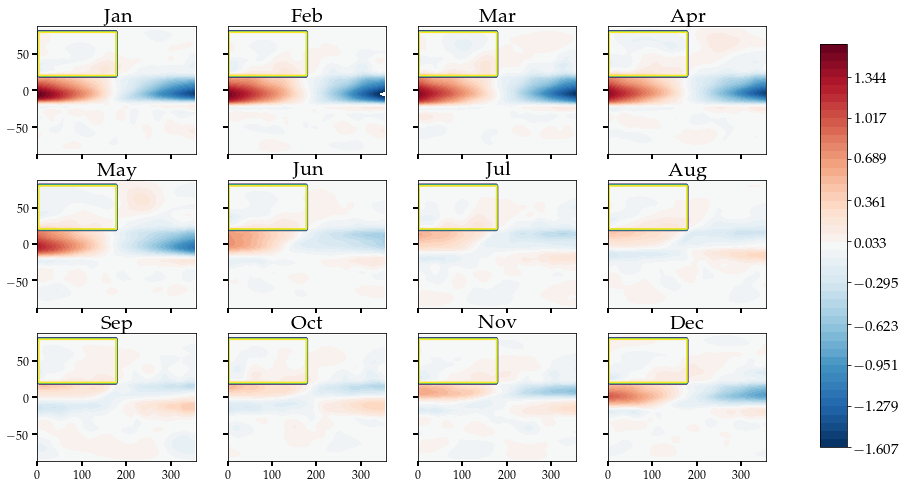

In [39]:
fig, ax = py.subplots(nrows=3, ncols=4, figsize=(15,8), sharex=True, sharey=True)

d=0;h=0
ht=-1;
m=-1
cobar      = (psi_l[:,:,:,ht,:,:]/10**8).mean(axis=1).mean(axis=1)
diff_bar   = cobar-cobar.mean(axis=-1)[:,:,None]
vv         = np.linspace(-1*np.max(diff_bar),np.max(diff_bar),50,endpoint=True)
my_cmap_r  = rc.rcmap(cm.RdBu)
for row in ax:
    for col in row:
        m=m+1
        plot      = (psi_l[m,:,:,ht,:,:]/10**8).mean(axis=0).mean(axis=0)
        diff      =  plot-plot.mean(axis=-1)[:,None]
        im=col.contourf(lon[:-1], lat[:-1], diff, vv,cmap=my_cmap_r)
        col.contour(lon,lat,land_mask)
        col.tick_params(labelsize=12,size=5,width=2)
        col.set_title(months[m],fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar= fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
py.show()

In [43]:
def plot_contours(x,ht,y) :
    fig, ax = py.subplots(nrows=3, ncols=4, figsize=(15,8), sharex=True, sharey=True)
    d=0;h=0
#     ht=0;
    m=-1
    cobar      = (x[:,:,:,ht,:,:]).mean(axis=1).mean(axis=1)
    diff_bar   =cobar#-cobar.mean(axis=-1)[:,:,None]
    #vv         = np.linspace(-np.max(diff_bar),np.max(diff_bar),50,endpoint=True)# for height field 
    vv         = np.linspace(np.min(diff_bar),-np.min(diff_bar),50,endpoint=True)
    my_cmap_r  = rc.rcmap(cm.RdBu)
    for row in ax:
        for col in row:
            m=m+1
            plot      = (x[m,:,:,ht,:,:]).mean(axis=0).mean(axis=0)
            diff      =  plot#-plot.mean(axis=-1)[:,None]
            co        = (y[m,:,:,ht,:,:]).mean(axis=0).mean(axis=0)
            #col.contour(lon,lat,land_mask)
            
#             im=col.contourf(lon[:-1], lat[:-1], diff, vv,cmap=my_cmap_r)
#             c= col.contour(lon[:-1], lat[:-1], co, colors='k',linewidths=0.5) ;py.clabel(c, fmt = '%1.0f', fontsize=10, inline=1)
                        
                
            im=col.contourf(lon[:], lat[:], diff, vv,cmap=my_cmap_r)
            c= col.contour(lon[:], lat[:], co, colors='k',linewidths=0.5) ;py.clabel(c, fmt = '%1.0f', fontsize=10, inline=1)

            
            col.tick_params(labelsize=12,size=5,width=2)
            col.set_title(months[m],fontsize=25)
#             col.set_ylim([ 0, 80])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
    cbar= fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=15)
    py.show()

In [ ]:
ht=7
plot_contours((psi_l-psi)/10**7,ht,psi/10**7)

In [30]:
ht=7
plot_contours(((psi_l-psi_l.mean(axis=-1)[...,None])-(psi-psi.mean(axis=-1)[...,None]))/10**7,ht,(psi-psi.mean(axis=-1)[...,None])/10**7)
print plev[ht]
print ht

NameError: name 'psi_l' is not defined

In [ ]:
ht=7
plot_contours(((psi_l-psi_l.mean(axis=-1)[...,None])-(psi-psi.mean(axis=-1)[...,None]))/10**7,ht,(psi-psi.mean(axis=-1)[...,None])/10**7)
print plev[ht]
print ht

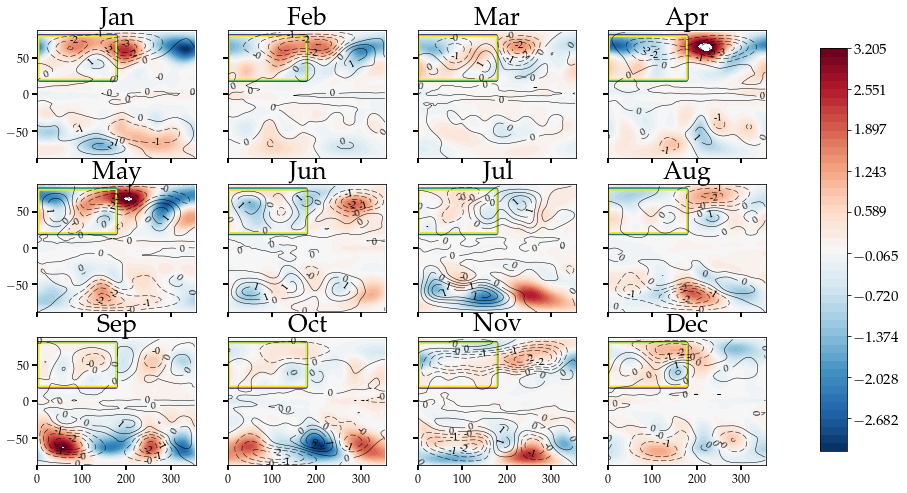

66.1485798511
20


In [18]:
ht=20
plot_contours((psi_l-psi)/10**7,ht,psi/10**7)
print plev[ht]
print ht

In [19]:
np.max(psi_l-psi)/10**7

60.416233268756486

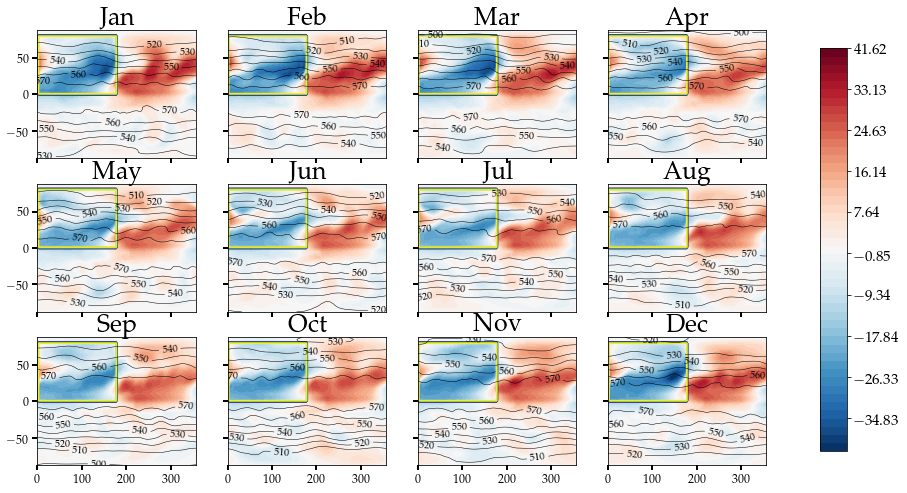

In [11]:
ht=-1
plot_contours( (exp_ht_l-exp_ht_l.mean(axis=-1)[...,None])-(exp_ht-exp_ht.mean(axis=-1)[...,None]), ht, exp_ht )
# print plev[ht]
# print ht

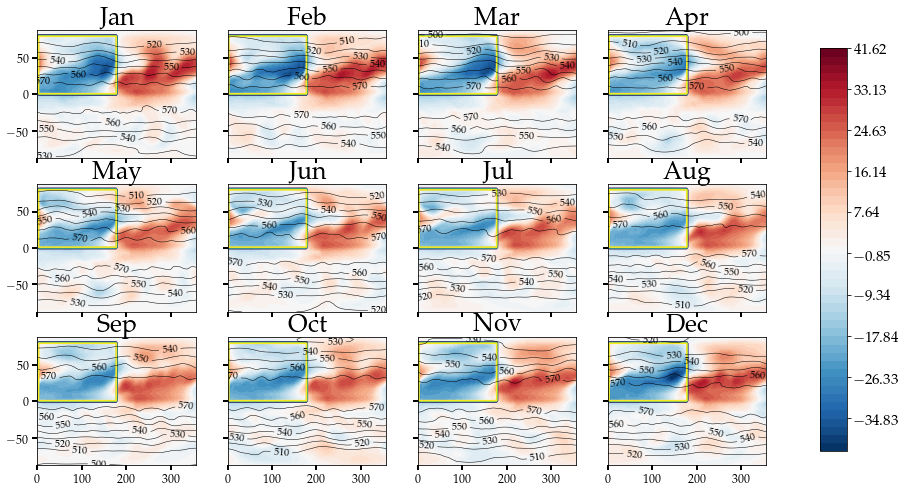

In [11]:
ht=-1
plot_contours(exp_ht_l-exp_ht, ht, exp_ht )
# print plev[ht]
# print ht

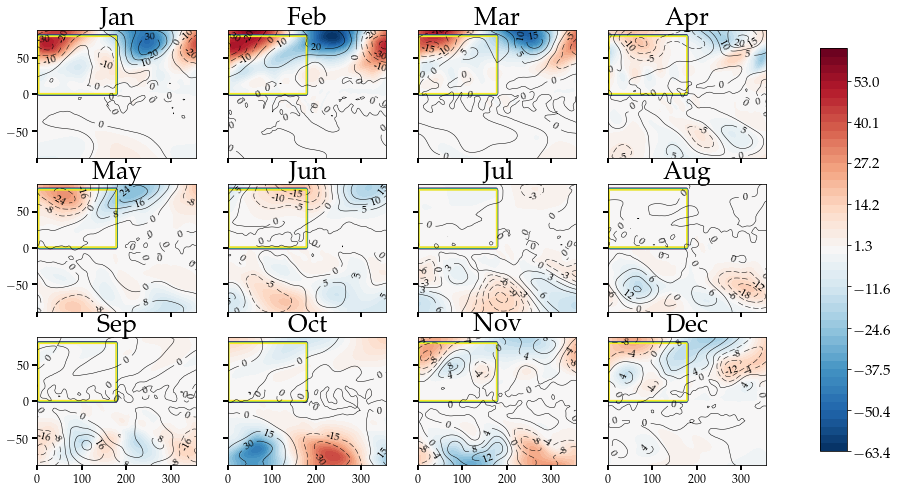

In [11]:
ht=7
plot_contours(exp_v_l-exp_v,ht,exp_v)

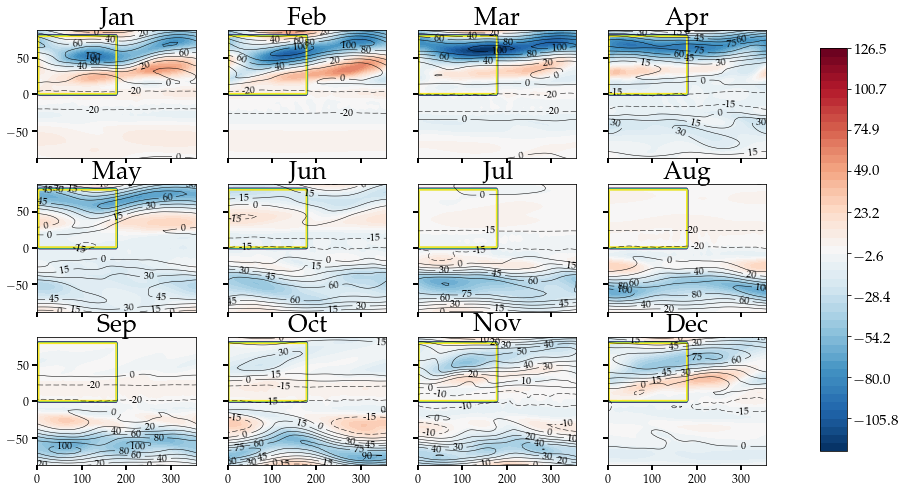

In [10]:
ht=7
plot_contours(exp_u_l-exp_u,ht,exp_u)

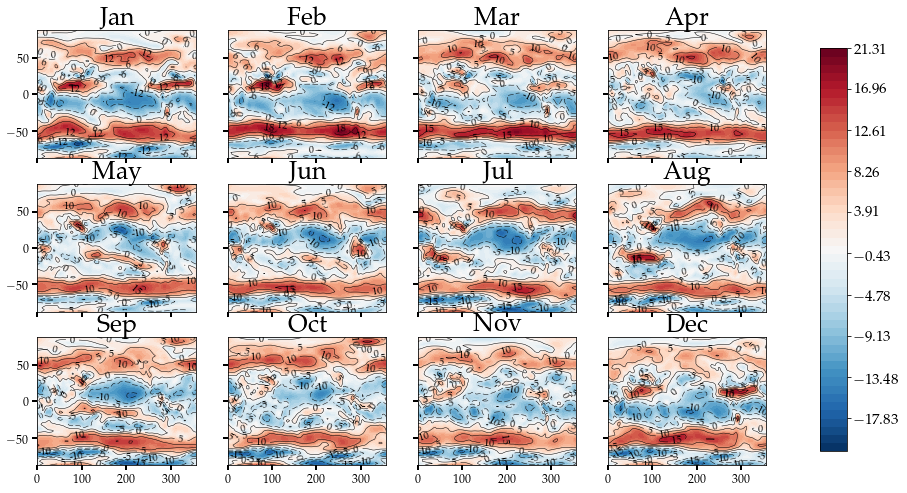

In [49]:
ht=-1
plot_contours(exp_u,ht,exp_u)

In [47]:
def plot_vertical(x,lo,ht,y) :
    fig, ax = py.subplots(nrows=3, ncols=4, figsize=(15,8), sharex=True, sharey=True)
    ax[0,0].invert_yaxis()
    d=0;h=0
#     ht=0;
    m=-1
    cobar      = (x[:,:,:,:,:,:]).mean(axis=1).mean(axis=1).mean(axis=-1)
    diff_bar   =cobar#-cobar.mean(axis=-1)[:,:,None]
    vv         = np.linspace(np.min(diff_bar),-1*np.min(diff_bar),50,endpoint=True)
    my_cmap_r  = rc.rcmap(cm.RdBu)
    for row in ax:
        for col in row:
            m=m+1
            plot      = (x[m,:,:,:,:,:]).mean(axis=0).mean(axis=0).mean(axis=-1)
            diff      =  plot#-plot.mean(axis=-1)[:,None]
            #im=col.contourf(lat[:], (plev[::-1]), diff, vv,cmap=my_cmap_r)
#             col.contour(lon,lat,land_mask)
            co        = (x[m,:,:,:,:,:]).mean(axis=0).mean(axis=0).mean(axis=-1)
            c= col.contour(lat[:], (plev[:]), co, colors='k',linewidths=0.5) ;py.clabel(c, fmt = '%1.0f', fontsize=10, inline=1)
            col.tick_params(labelsize=12,size=5,width=2)
            col.set_title(months[m],fontsize=25)
            col.set_yscale('log')
            #col.axhline((plev[ht]))
    fig.subplots_adjust(right=0.8)
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
    #cbar= fig.colorbar(im, cax=cbar_ax)
    #cbar.ax.tick_params(labelsize=15)
    py.show()

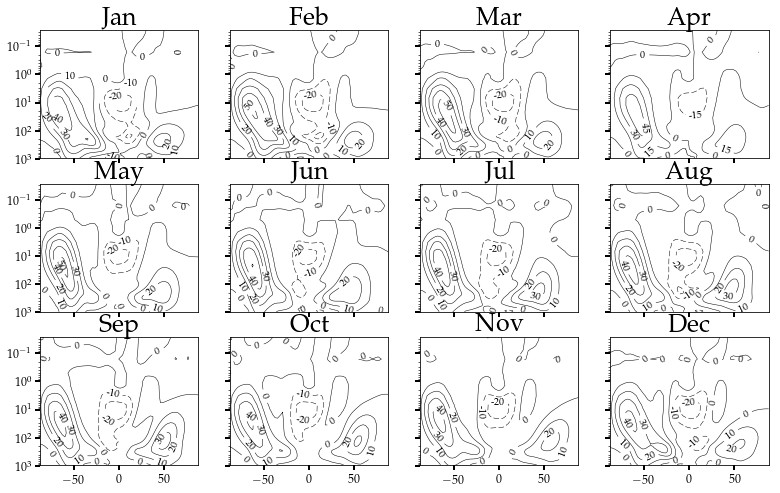

In [48]:
ht=0
plot_vertical((exp_u+exp_u2+exp_u3+exp_u4+exp_u5)/5,0,ht, exp_u)

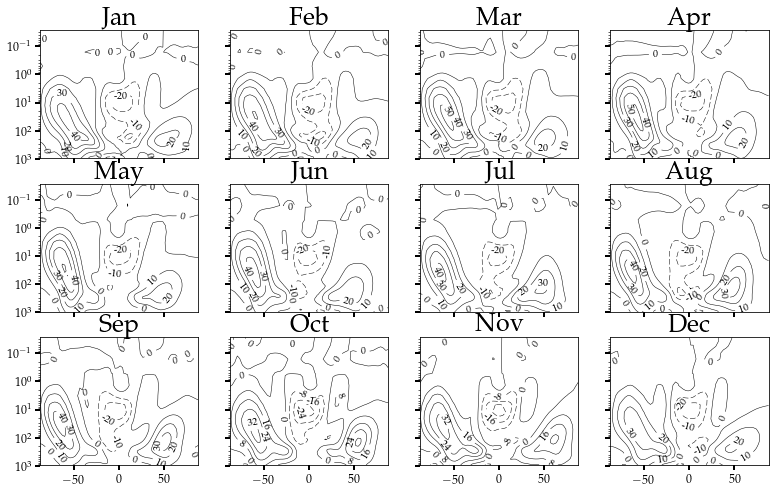

In [42]:
plot_vertical(exp_u2,0,ht, exp_u2)

In [33]:
def plot_monsoon(x, mo):
    m=120*(mo-1)
    post_monsoon=x
    post_monsoon.shape
    co        = (post_monsoon[m:m+20,:,:,:]).mean(axis=0).mean(axis=-1)
    c         = py.contour(lat[:], (plev[:]), co, 25, colors='k',linewidths=0.5) ;py.clabel(c, fmt = '%1.0f', fontsize=10, inline=1)
    py.tick_params(labelsize=12,size=5,width=2)
    py.gca().invert_yaxis()
    py.xlim(-60,60)
    py.ylim(1000,100)

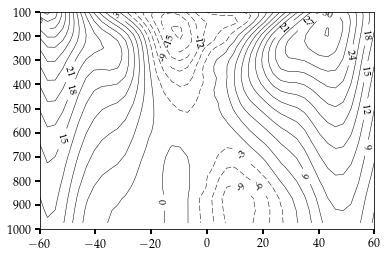

In [32]:
plot_monsoon((u+u2+u3+u4+u5)/5, 7)

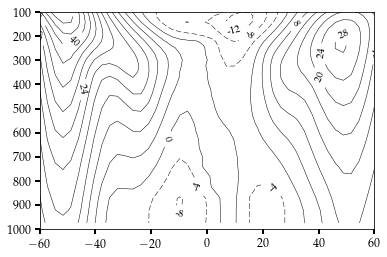

In [36]:
plot_monsoon((u+u2+u3+u4+u5)/5, 3)

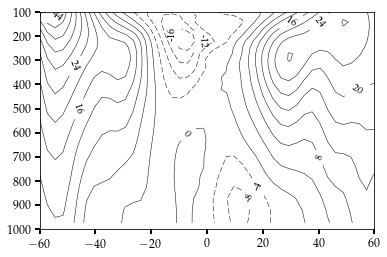

In [23]:
plot_monsoon(u3, 6)

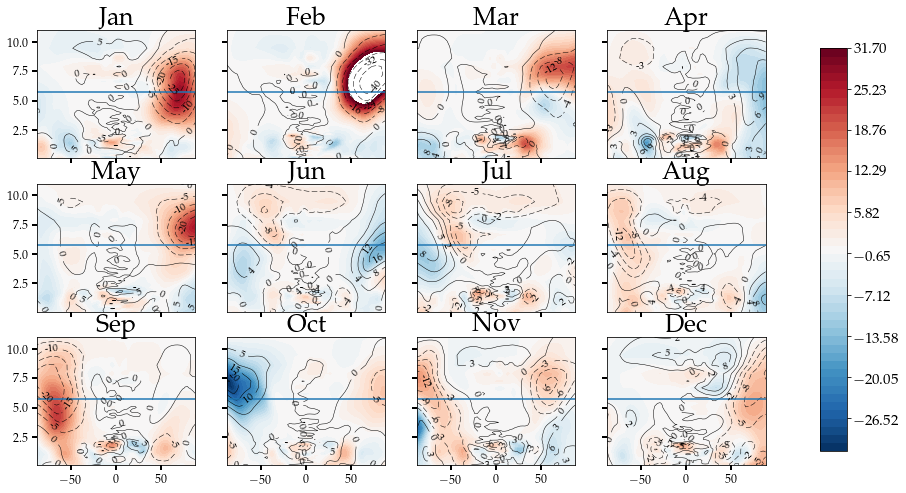

In [41]:
plot_vertical(exp_v_l-exp_v,len(lon)/2+60,ht, exp_v)

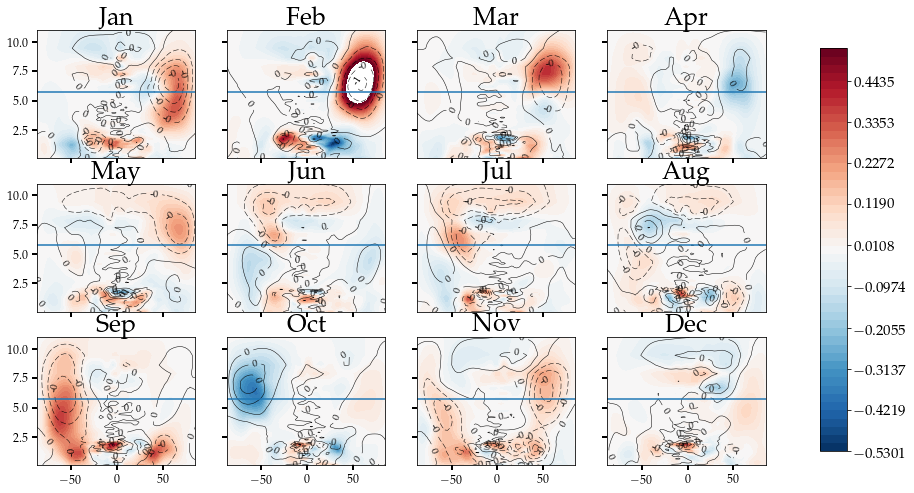

In [15]:
ht=7
plot_vertical((psi_l-psi)/10**7,0,ht,psi/10**7)
# print plev[ht]
# print ht

In [ ]:
print "ok"